In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


In [ ]:
# load the images into memory
(X_train, trainy), (X_test, testy) = mnist.load_data()
# summarize the shape of the dataset
print('Train', X_train.shape, trainy.shape)
print('Test', X_test.shape, testy.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


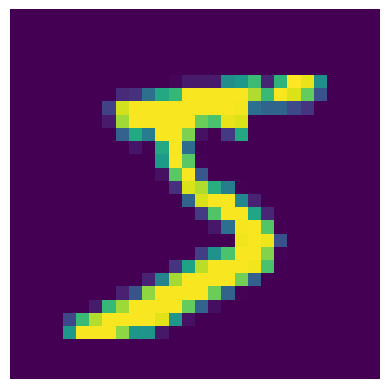

In [ ]:
# Display one of the images
plt.imshow(X_train[0])
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
#Define input image dimensions
#Large images take too much time and resources.
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

In [ ]:
def build_generator():
    noise_shape = (100,) # 1D array of size 100 (latent vector / noise)
    img_shape = (28, 28, 1) # Shape of the image

    # input layer for the noise
    noise = Input(shape=noise_shape)

    # generator network
    den = tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(noise)
    den = tf.keras.layers.BatchNormalization(momentum=0.8)(den)
    den = tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(den)
    den = tf.keras.layers.BatchNormalization(momentum=0.8)(den)
    den = tf.keras.layers.Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(den)
    den = tf.keras.layers.BatchNormalization(momentum=0.8)(den)
    den = tf.keras.layers.Dense(np.prod(img_shape), activation='tanh')(den)
    den = tf.keras.layers.Reshape(img_shape)(den)

    # integrating
    model = tf.keras.Model(inputs=noise, outputs=den)


    return model

In [ ]:
def build_generator():
    noise_shape = (100,) # 1D array of size 100 (latent vector / noise)
    img_shape = (28, 28, 1) # Shape of the image

    # input layer for the noise
    noise = tf.keras.layers.Input(shape=noise_shape)

    # generator network
    den = tf.keras.layers.Dense(7 * 7 * 128, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(noise)
    den = tf.keras.layers.Reshape((7, 7, 128))(den)
    den = tf.keras.layers.BatchNormalization(momentum=0.8)(den)
    den = tf.keras.layers.Conv2DTranspose(64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.1))(den)
    den = tf.keras.layers.BatchNormalization(momentum=0.8)(den)
    den = tf.keras.layers.Conv2DTranspose(1, kernel_size=(5, 5), strides=(2, 2), padding='same', activation='tanh')(den)

    # integrating
    model = tf.keras.Model(inputs=noise, outputs=den)

    return model

In [ ]:
gan =build_generator()
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 128)         512       
 Normalization)                                                  
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 64)        204864    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256   

In [ ]:
gan =build_generator()
gan.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_2 (Bat  (None, 7, 7, 128)         512       
 chNormalization)                                                
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 14, 14, 64)        204864    
 Transpose)                                                      
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 64)        256 

In [ ]:
def build_discriminator():
    img_shape = (28, 28, 1)  # Assuming this is defined somewhere

    # Define input layer for the image
    img = tf.keras.layers.Input(shape=img_shape)

    # Define your discriminator network
    dis = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same')(img)
    dis = tf.keras.layers.BatchNormalization()(dis)
    dis = tf.keras.layers.LeakyReLU(alpha=0.1)(dis)

    dis = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same')(dis)
    dis = tf.keras.layers.LeakyReLU(alpha=0.1)(dis)

    dis = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same')(dis)
    dis = tf.keras.layers.LeakyReLU(alpha=0.1)(dis)

    dis = tf.keras.layers.Flatten()(dis)
    dis = tf.keras.layers.Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(dis)
    dis = tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(dis)
    dis = tf.keras.layers.Dense(4, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(dis)
    validity = tf.keras.layers.Dense(1, activation='sigmoid')(dis)

    # Combine the input and output into a model
    model = tf.keras.Model(inputs=img, outputs=validity)

    return model

In [ ]:
dis =build_discriminator()
dis.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 64)        0         
                                                           

In [ ]:
def train(X_train, epochs, batch_size=256, save_interval=50):


    half_batch = int(batch_size / 2)


    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random half batch of real images
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]


        noise = np.random.normal(0, 1, (half_batch, 100))

        # Generate a half batch of fake images
        gen_imgs = generator.predict(noise)

        # Train the discriminator on real and fake images, separately
        #Research showed that separate training is more effective.
        x_dis_train = np.concatenate((imgs, gen_imgs), axis=0)
        y_dis_train = np.concatenate((np.ones((half_batch, 1)), np.zeros((half_batch, 1))), axis=0)

        indices = np.arange(x_dis_train.shape[0])
        np.random.shuffle(indices)

        x_dis_train = x_dis_train[indices]
        y_dis_train = y_dis_train[indices]

        # Train the discriminator
        i = 0
        discriminator.trainable = True
        while i < 20:
            d_history = discriminator.fit(x_dis_train,
                                          y_dis_train,
                                          #batch_size=batch_size,
                                          epochs=5,
                                          verbose=0
                                         )
            d_loss = d_history.history['accuracy'][-1]
            if d_loss > 0.90:
                print('yes')
                break
            i += 1


#And within the same loop we train our Generator, by setting the input noise and
#ultimately training the Generator to have the Discriminator label its samples as valid
#by specifying the gradient loss.
        # ---------------------
        #  Train Generator
        # ---------------------
#Create noise vectors as input for generator.
#Create as many noise vectors as defined by the batch size.
#Based on normal distribution. Output will be of size (batch size, 100)
        input_noise = np.random.normal(0, 1, (batch_size, 100))

        # The generator wants the discriminator to label the generated samples
        # as valid (ones)
        #This is where the genrator is trying to trick discriminator into believing
        #the generated image is true (hence value of 1 for y)
        valid_y = np.array([1] * batch_size) #Creates an array of all ones of size=batch size

        # Generator is part of combined where it got directly linked with the discriminator
        # Train the generator with noise as x and 1 as y.
        # Again, 1 as the output as it is adversarial and if generator did a great
        #job of folling the discriminator then the output would be 1 (true)
        noise = tf.keras.layers.Input(shape=(100,))
        generated_img = generator(noise)

        discriminator.trainable = False
        validity = discriminator(generated_img)

        # The combined model (stacking generator and discriminator)
        combined_model = tf.keras.Model(inputs=noise, outputs=validity)
        combined_model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )



        i=0
        while i < 20:
            g_history = combined_model.fit(input_noise,
                                           valid_y,
                                           #batch_size=batch_size,
                                           epochs=10,
                                           verbose=0
                                          )
            g_loss = g_history.history['accuracy'][-1]
            if g_loss > 0.95:
                print('no')
                break
            i += 1


        r, c = 1, 5
        noise = np.random.normal(0, 1, (1 * 1, 100))
        gen_imgs = generator.predict(noise)

        # Display one of the images
        plt.imshow(gen_imgs[0])
        plt.axis('off')  # Hide axis
        plt.show()

1/1 [==============================] - 1s 805ms/step
yes
no
1/1 [==============================] - 0s 159ms/step


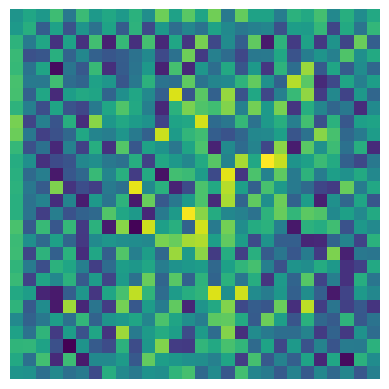

1/1 [==============================] - 0s 147ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


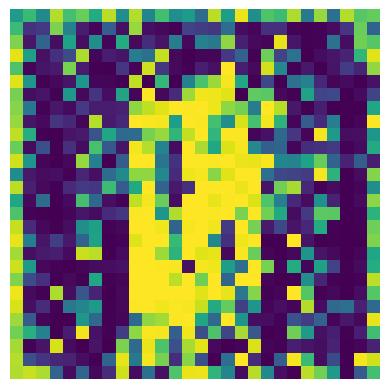

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


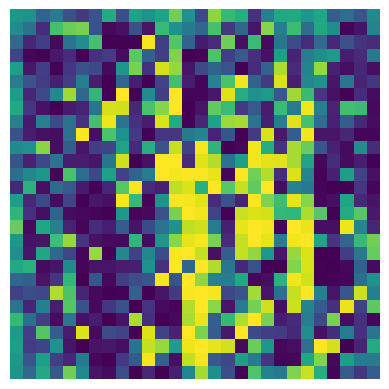

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


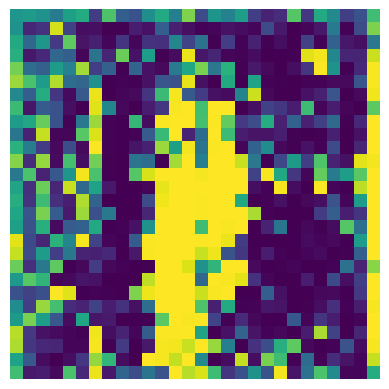

1/1 [==============================] - 0s 38ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


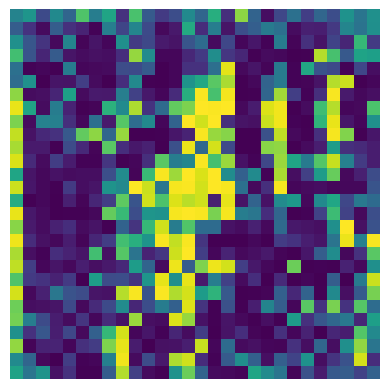

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 28ms/step


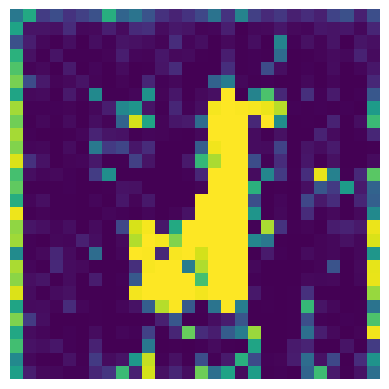

1/1 [==============================] - 0s 54ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


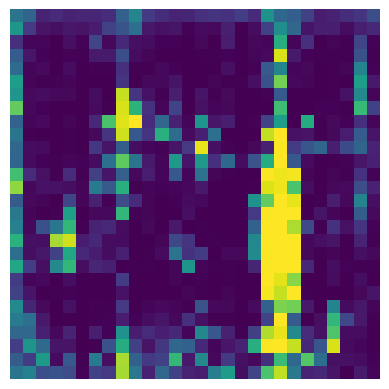

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


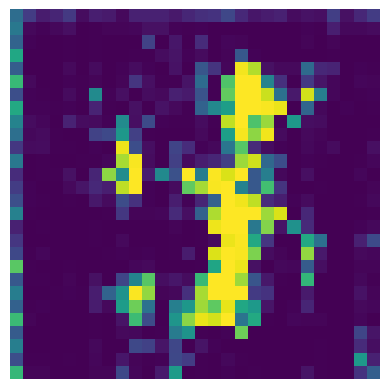

1/1 [==============================] - 0s 47ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


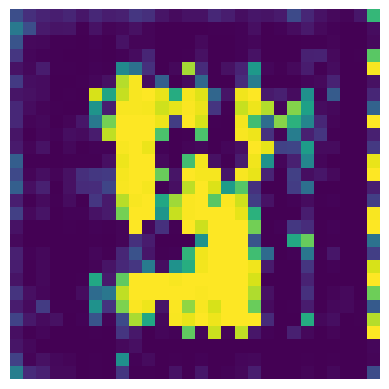

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


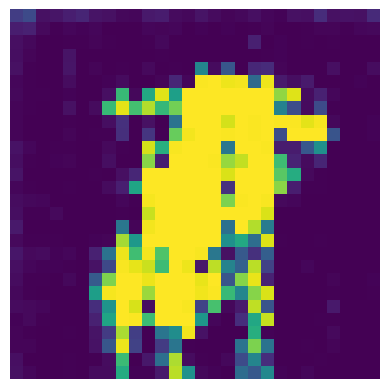

1/1 [==============================] - 0s 49ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


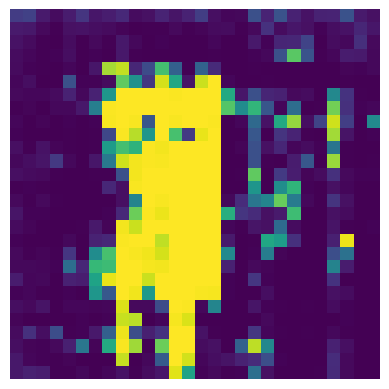

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 27ms/step


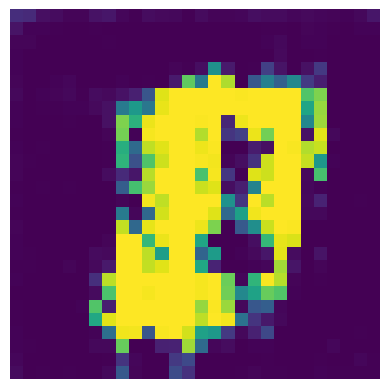

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


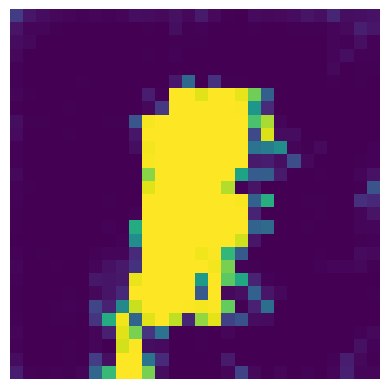

1/1 [==============================] - 0s 50ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


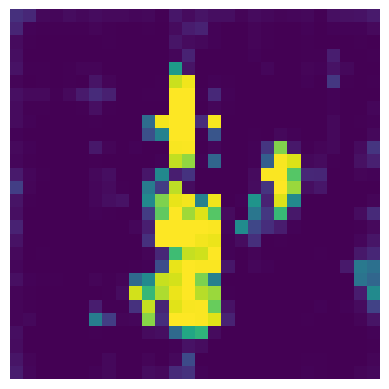

1/1 [==============================] - 0s 45ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


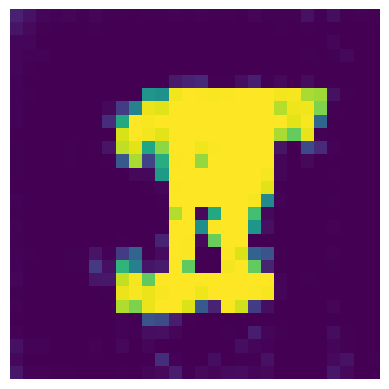

1/1 [==============================] - 0s 38ms/step
yes
no
1/1 [==============================] - 0s 21ms/step


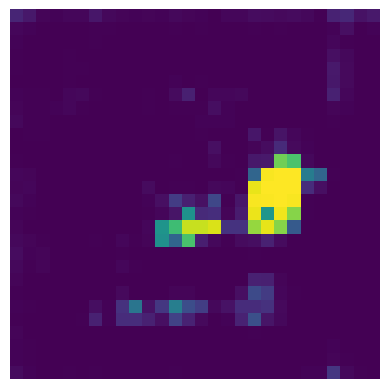

1/1 [==============================] - 0s 34ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


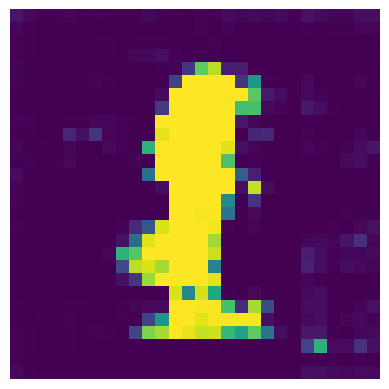

1/1 [==============================] - 0s 46ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


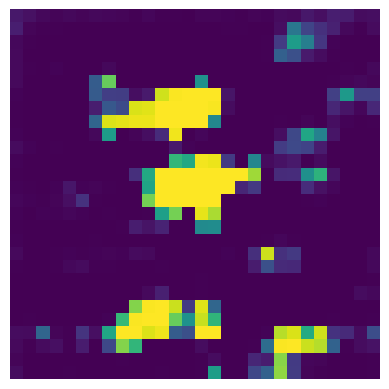

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 32ms/step


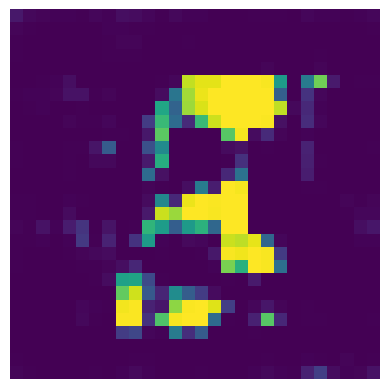

1/1 [==============================] - 0s 58ms/step
yes
no
1/1 [==============================] - 0s 30ms/step


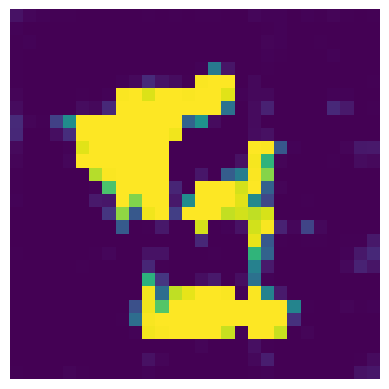

1/1 [==============================] - 0s 61ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


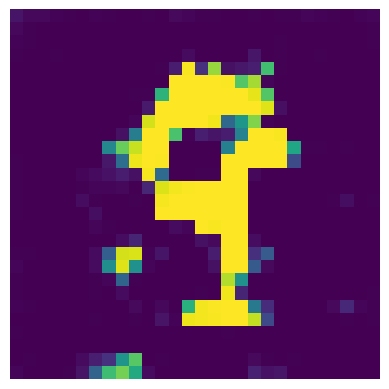

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


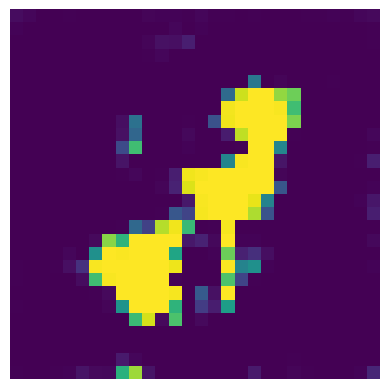

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 37ms/step


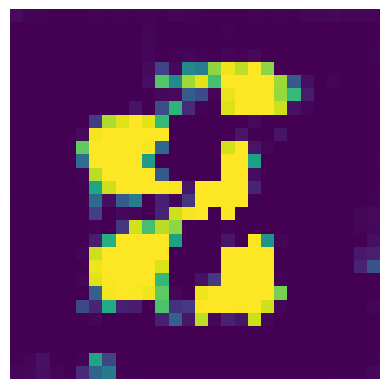

1/1 [==============================] - 0s 38ms/step
yes
no
1/1 [==============================] - 0s 42ms/step


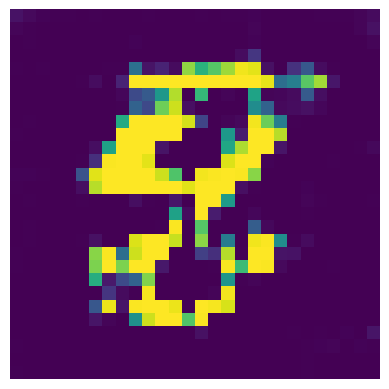

1/1 [==============================] - 0s 57ms/step
yes
no
1/1 [==============================] - 0s 34ms/step


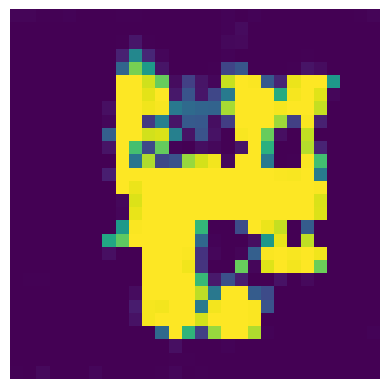

1/1 [==============================] - 0s 54ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


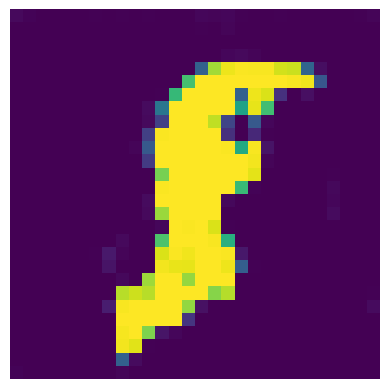

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 21ms/step


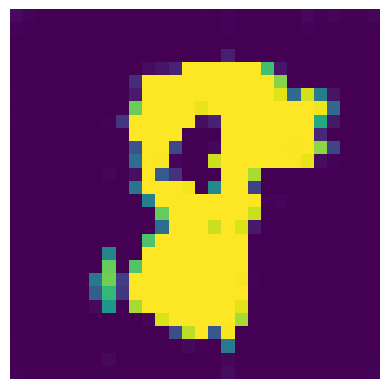

1/1 [==============================] - 0s 39ms/step
yes
no
1/1 [==============================] - 0s 26ms/step


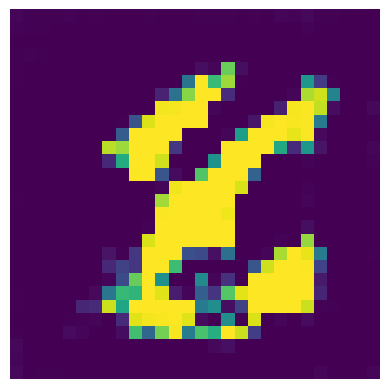

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


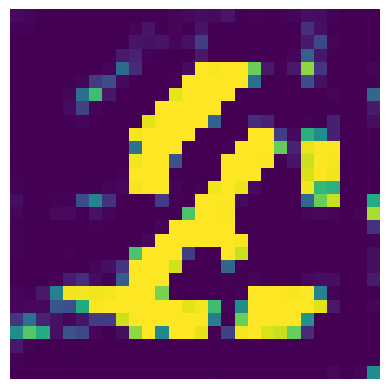

1/1 [==============================] - 0s 38ms/step
yes
no
1/1 [==============================] - 0s 27ms/step


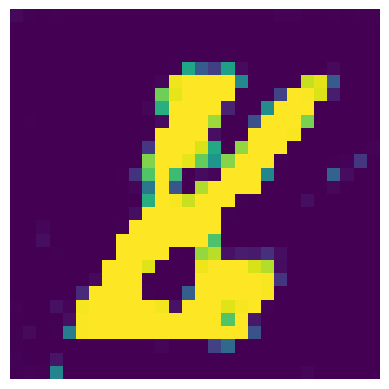

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 27ms/step


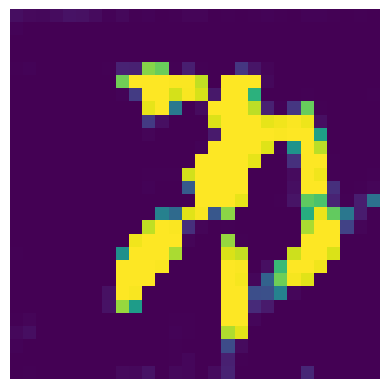

1/1 [==============================] - 0s 39ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


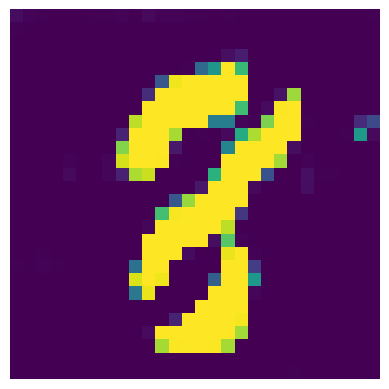

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


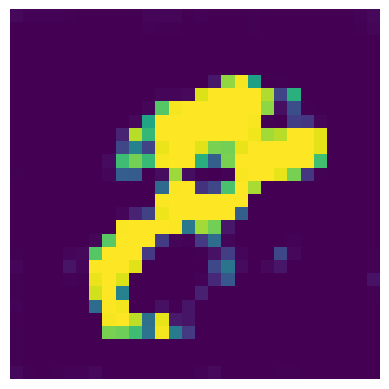

1/1 [==============================] - 0s 45ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


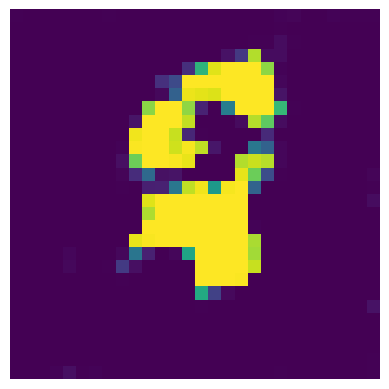

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


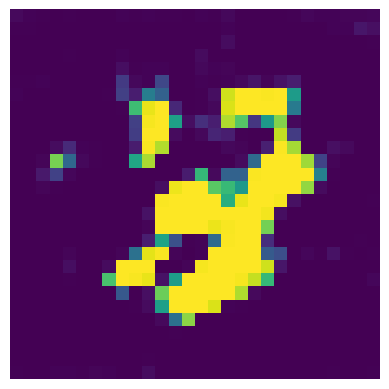

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 21ms/step


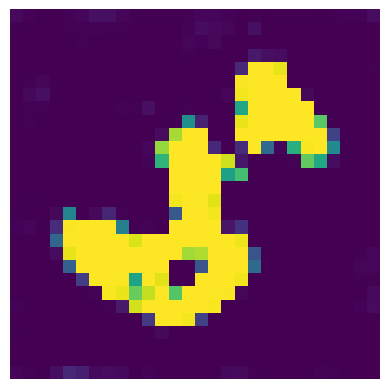

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


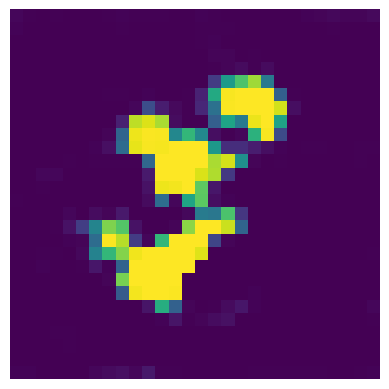

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


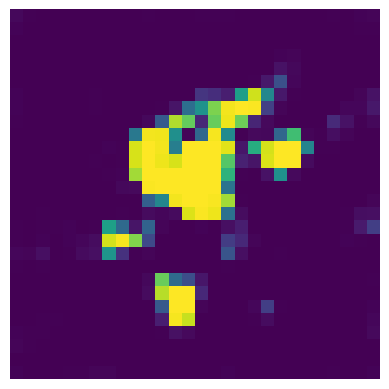

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 26ms/step


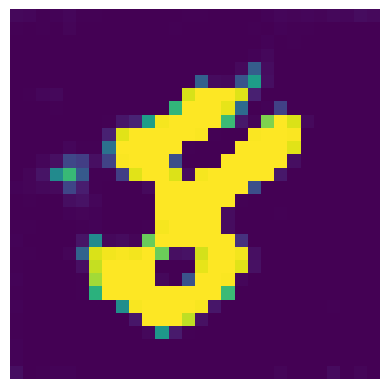

1/1 [==============================] - 0s 38ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


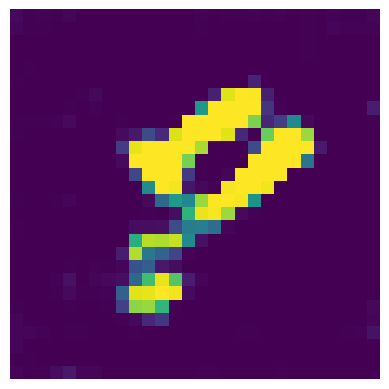

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


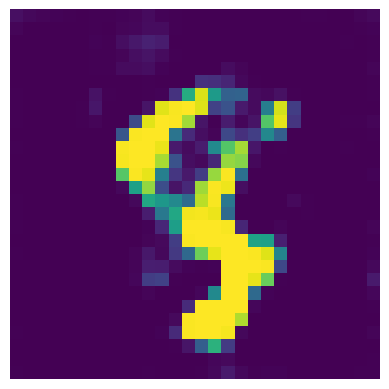

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


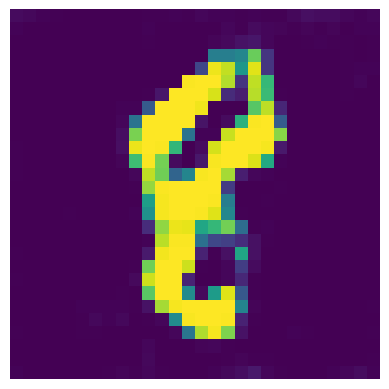

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


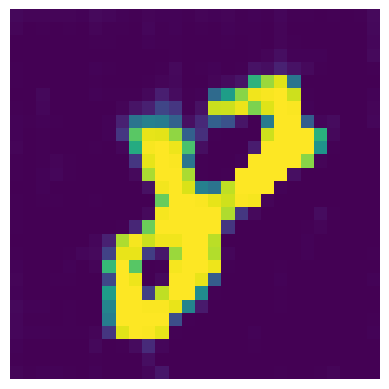

1/1 [==============================] - 0s 37ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


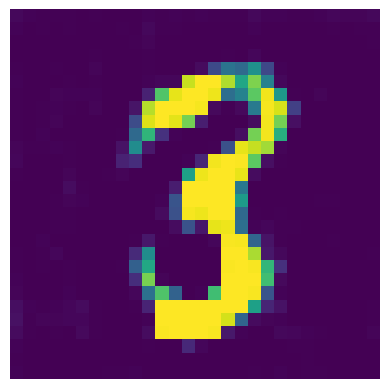

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


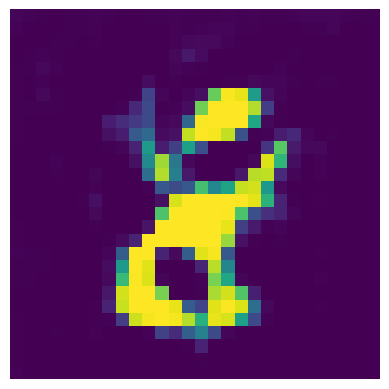

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 28ms/step


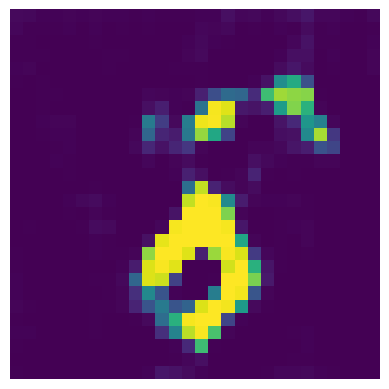

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


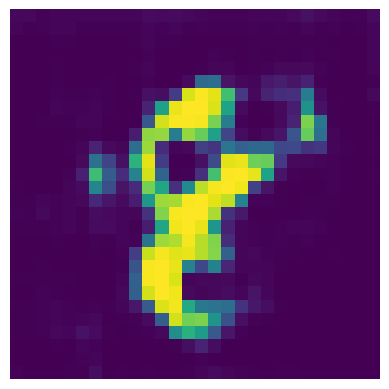

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


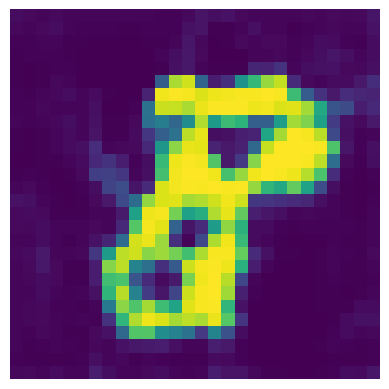

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


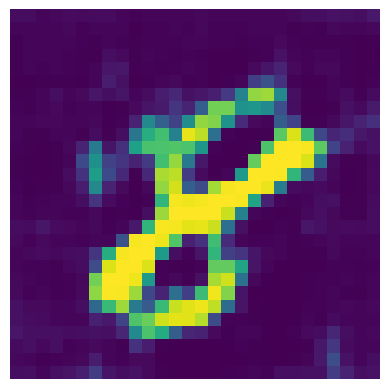

1/1 [==============================] - 0s 44ms/step
yes
no
1/1 [==============================] - 0s 28ms/step


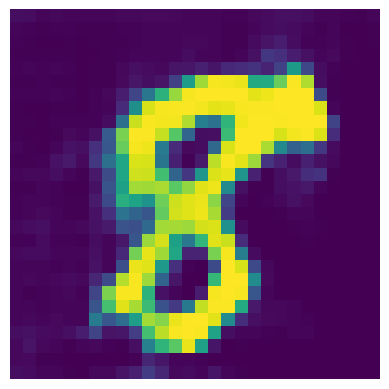

1/1 [==============================] - 0s 35ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


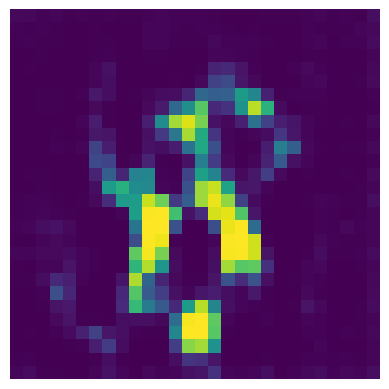

1/1 [==============================] - 0s 49ms/step
yes
no
1/1 [==============================] - 0s 27ms/step


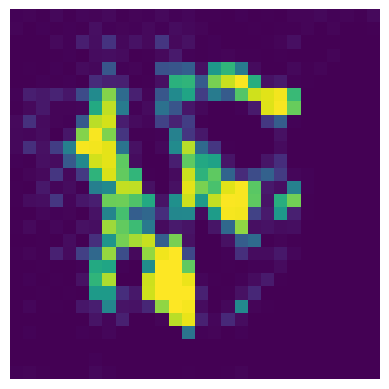

1/1 [==============================] - 0s 39ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


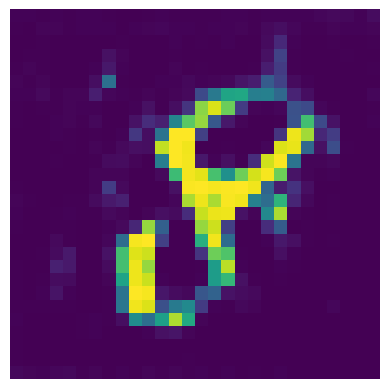

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 45ms/step


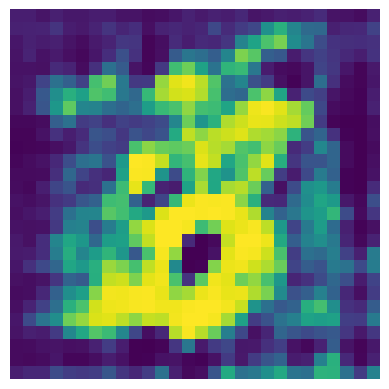

1/1 [==============================] - 0s 58ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


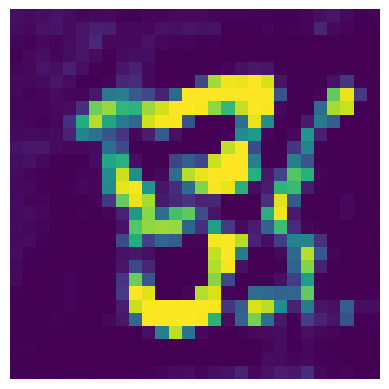

1/1 [==============================] - 0s 35ms/step
yes
no
1/1 [==============================] - 0s 26ms/step


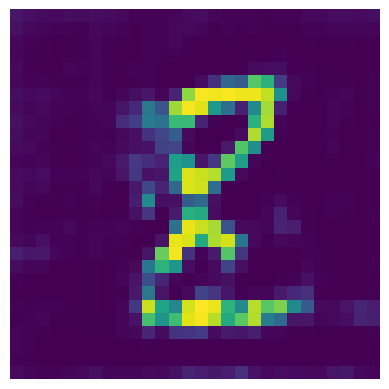

1/1 [==============================] - 0s 37ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


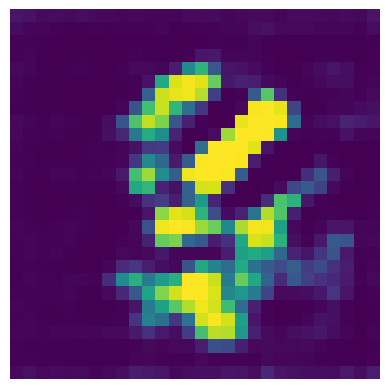

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


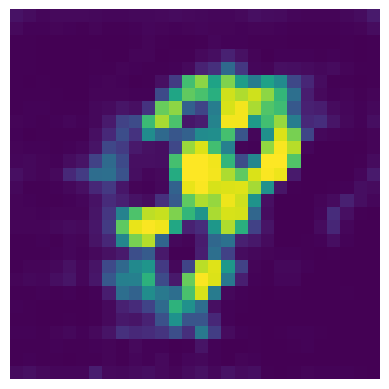

1/1 [==============================] - 0s 39ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


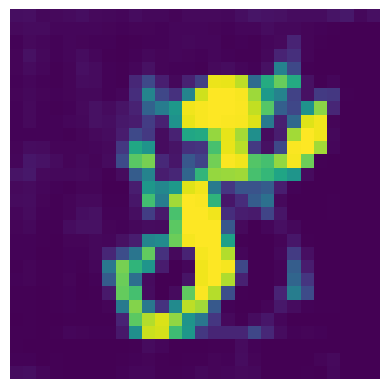

1/1 [==============================] - 0s 66ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


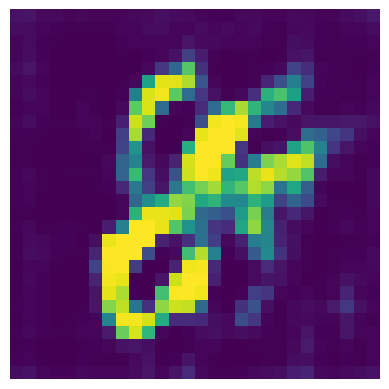

1/1 [==============================] - 0s 44ms/step
yes
no
1/1 [==============================] - 0s 28ms/step


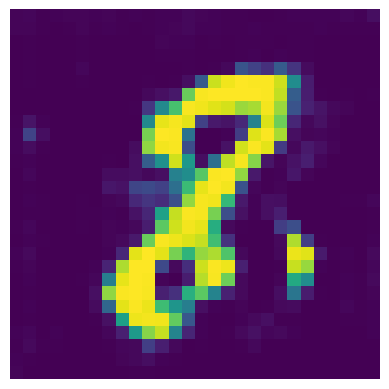

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 26ms/step


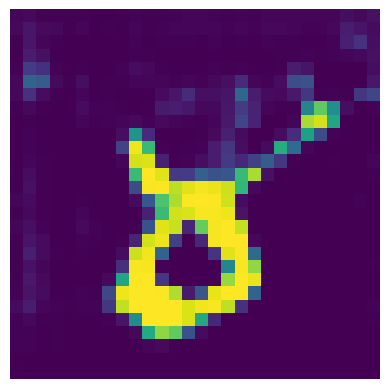

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 21ms/step


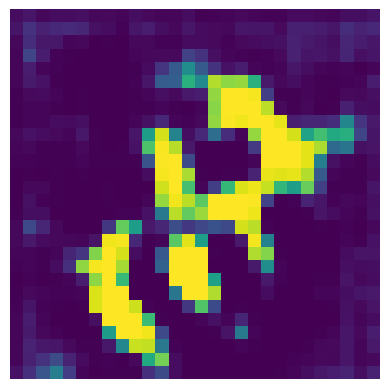

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 26ms/step


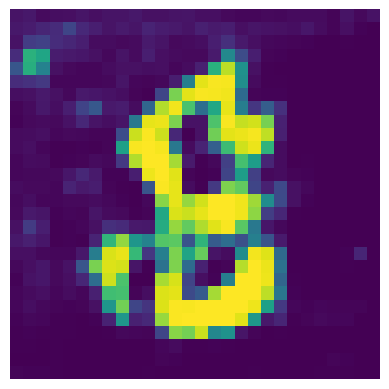

1/1 [==============================] - 0s 38ms/step
yes
no
1/1 [==============================] - 0s 21ms/step


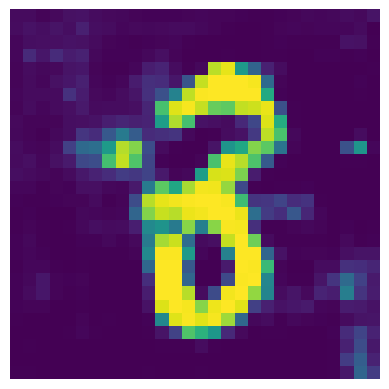

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


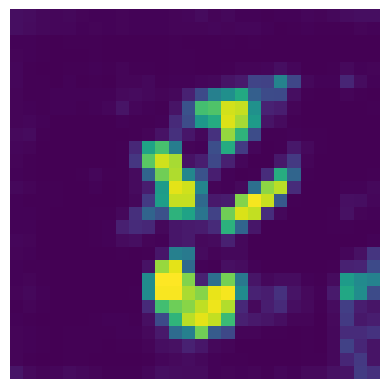

1/1 [==============================] - 0s 37ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


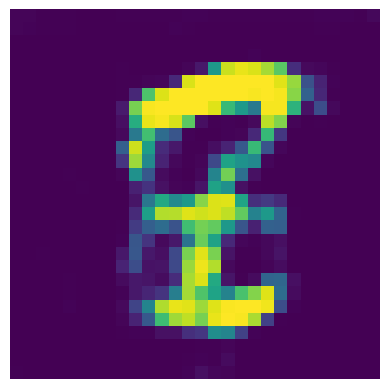

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


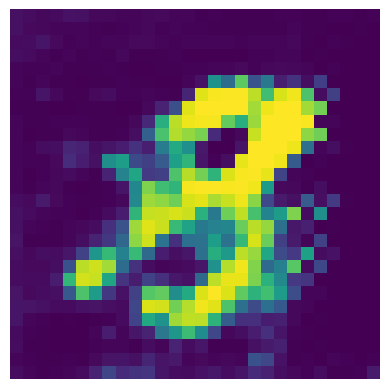

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


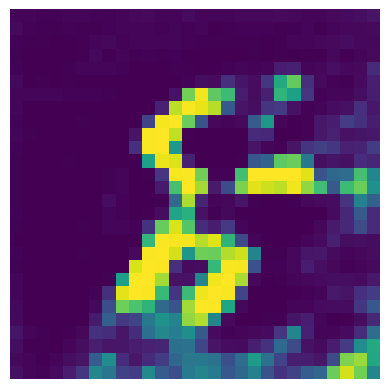

1/1 [==============================] - 0s 39ms/step
yes
no
1/1 [==============================] - 0s 32ms/step


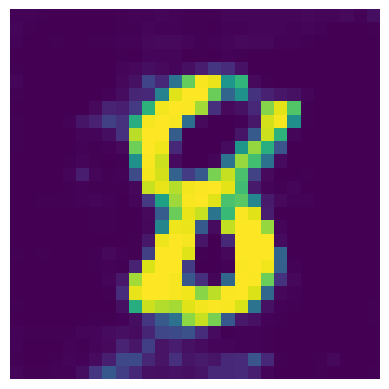

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 26ms/step


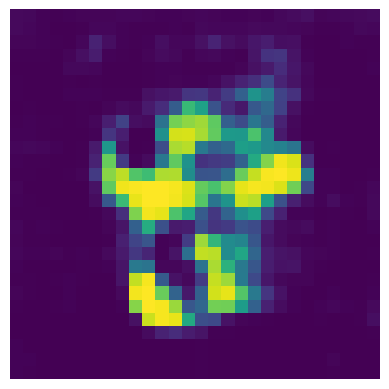

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 31ms/step


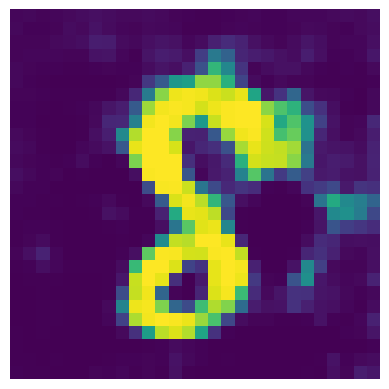

1/1 [==============================] - 0s 39ms/step
yes
no
1/1 [==============================] - 0s 29ms/step


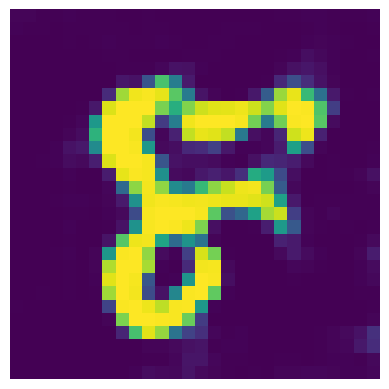

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


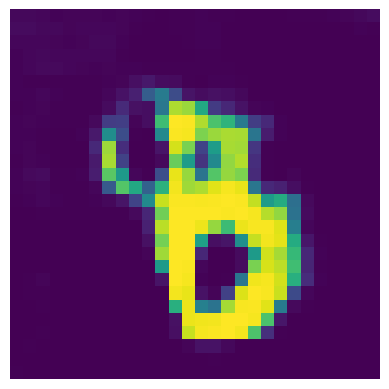

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 29ms/step


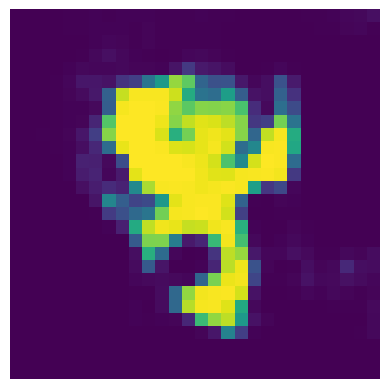

1/1 [==============================] - 0s 36ms/step
yes
no
1/1 [==============================] - 0s 32ms/step


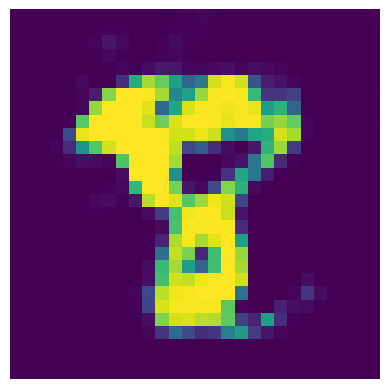

1/1 [==============================] - 0s 52ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


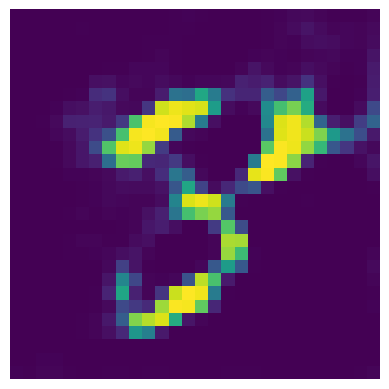

1/1 [==============================] - 0s 41ms/step
yes
1/1 [==============================] - 0s 22ms/step


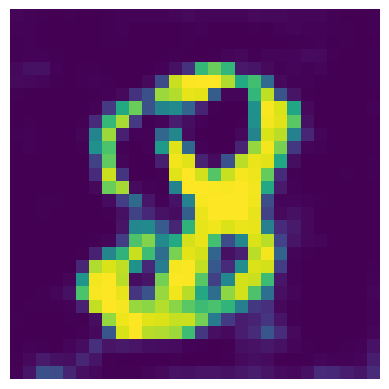

1/1 [==============================] - 0s 52ms/step
yes
no
1/1 [==============================] - 0s 21ms/step


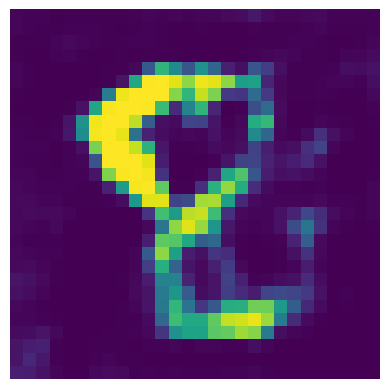

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


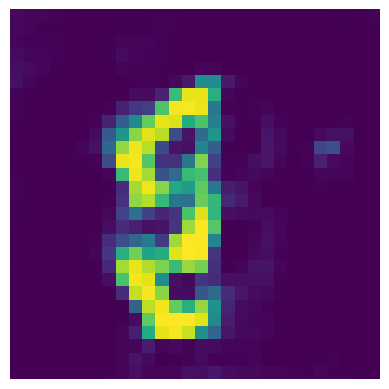

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 21ms/step


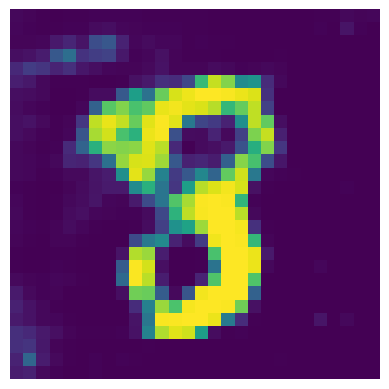

1/1 [==============================] - 0s 47ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


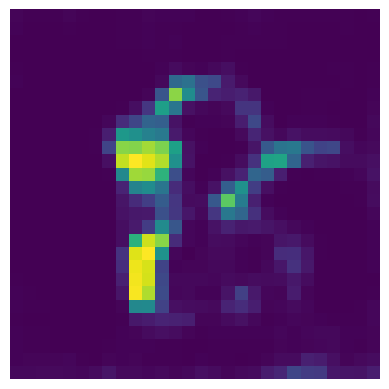

1/1 [==============================] - 0s 43ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


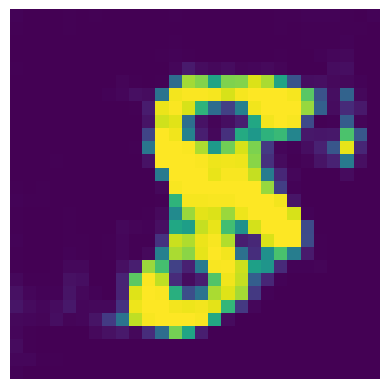

1/1 [==============================] - 0s 46ms/step
yes
no
1/1 [==============================] - 0s 32ms/step


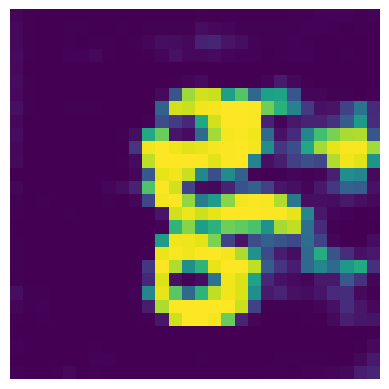

1/1 [==============================] - 0s 49ms/step
yes
no
1/1 [==============================] - 0s 38ms/step


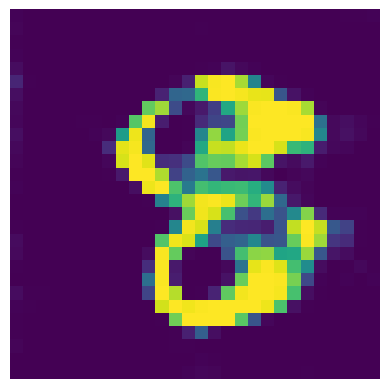

1/1 [==============================] - 0s 54ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


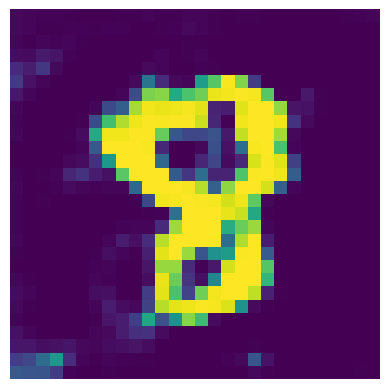

1/1 [==============================] - 0s 37ms/step
yes
no
1/1 [==============================] - 0s 24ms/step


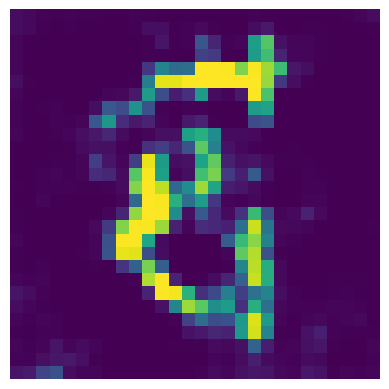

1/1 [==============================] - 0s 39ms/step
yes
1/1 [==============================] - 0s 37ms/step


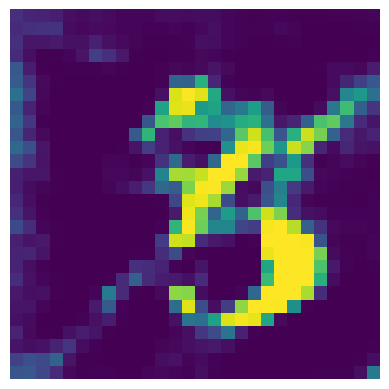

1/1 [==============================] - 0s 55ms/step
yes
1/1 [==============================] - 0s 35ms/step


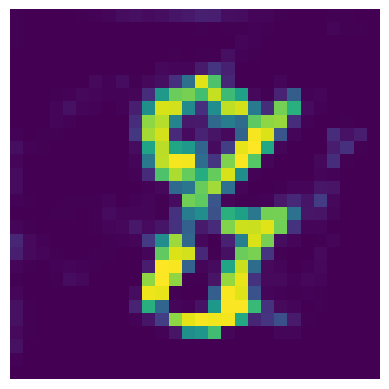

1/1 [==============================] - 0s 37ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


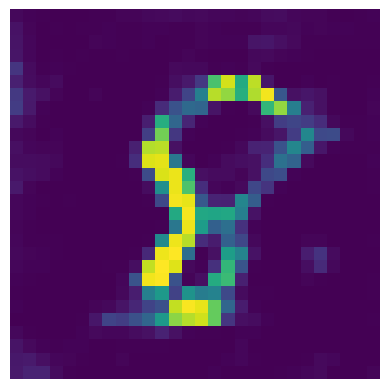

1/1 [==============================] - 0s 37ms/step
yes
no
1/1 [==============================] - 0s 25ms/step


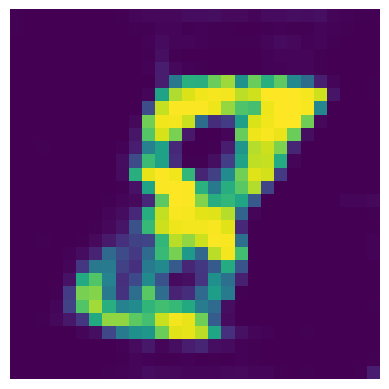

1/1 [==============================] - 0s 38ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


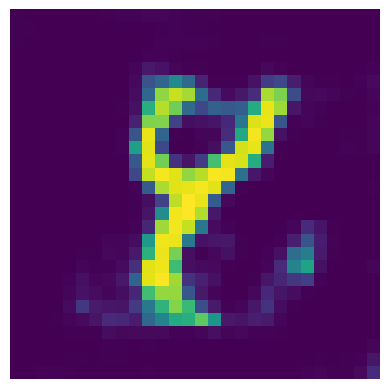

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


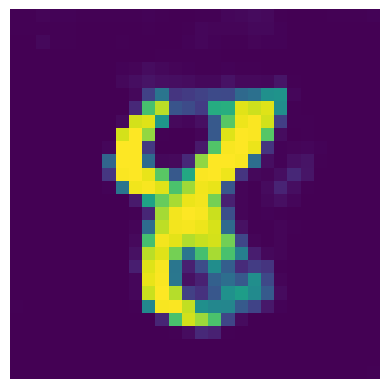

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 26ms/step


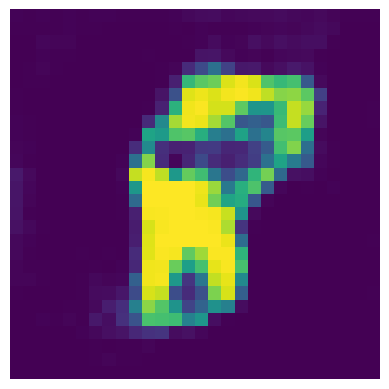

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 27ms/step


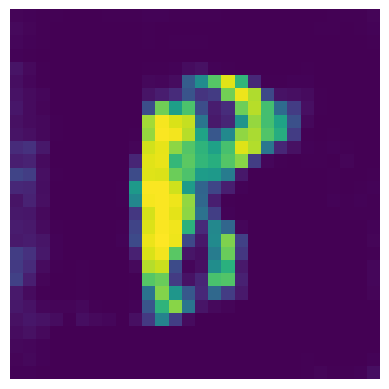

1/1 [==============================] - 0s 40ms/step
yes
no
1/1 [==============================] - 0s 36ms/step


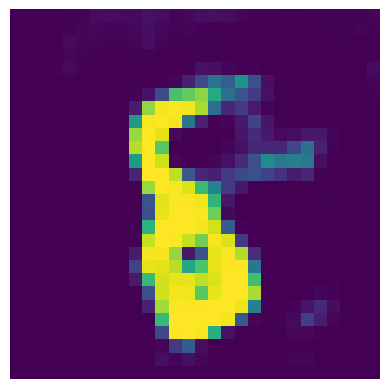

1/1 [==============================] - 0s 62ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


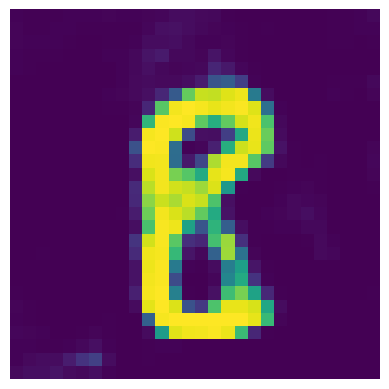

1/1 [==============================] - 0s 42ms/step
yes
no
1/1 [==============================] - 0s 22ms/step


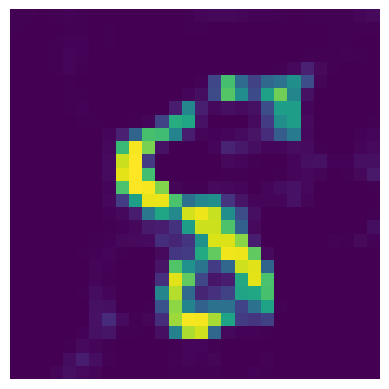

1/1 [==============================] - 0s 41ms/step
yes
no
1/1 [==============================] - 0s 34ms/step


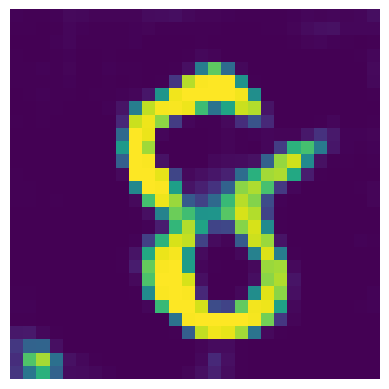

1/1 [==============================] - 0s 32ms/step
yes
no
1/1 [==============================] - 0s 23ms/step


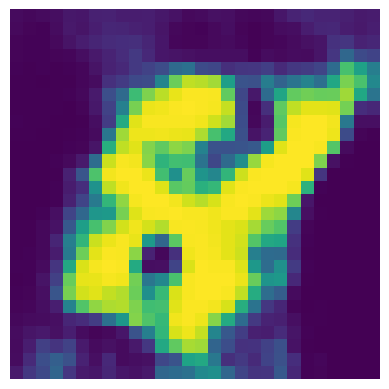

In [ ]:
(X_train, trainy), (X_test, testy) = mnist.load_data()

# Convert to float and Rescale -1 to 1 (Can also do 0 to 1)
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

#Add channels dimension. As the input to our gen and discr. has a shape 28x28x1.
X_train = np.expand_dims(X_train, axis=3)


# Build and compile the discriminator first.
discriminator = build_discriminator()
discriminator.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#build and compile our Discriminator, pick the loss function

#SInce we are only generating (faking) images, let us not track any metrics.
generator = build_generator()
generator.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
)

##This builds the Generator and defines the input noise.
#In a GAN the Generator network takes noise z as an input to produce its images.
z = Input(shape=(100,))   #Our random input to the generator
img = generator(z)

#This ensures that when we combine our networks we only train the Generator.
#While generator training we do not want discriminator weights to be adjusted.
#This Doesn't affect the above descriminator training.
discriminator.trainable = False

#This specifies that our Discriminator will take the images generated by our Generator
#and true dataset and set its output to a parameter called valid, which will indicate
#whether the input is real or not.
valid = discriminator(img)  #Validity check on the generated image


#Here we combined the models and also set our loss function and optimizer.
#Again, we are only training the generator here.
#The ultimate goal here is for the Generator to fool the Discriminator.
# The combined model  (stacked generator and discriminator) takes
# noise as input => generates images => determines validity

# The intended number for generation (0-9)
X_train_label_1 = X_train[trainy == 8]

train(X_train_label_1, epochs=100, batch_size=32, save_interval=10)

In [ ]:
X_train_label_1.shape

(5851, 28, 28, 1)